In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('diabetes.csv')

In [22]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [23]:
df.shape

(253680, 22)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [25]:

print("\nMissing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values in each column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [26]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

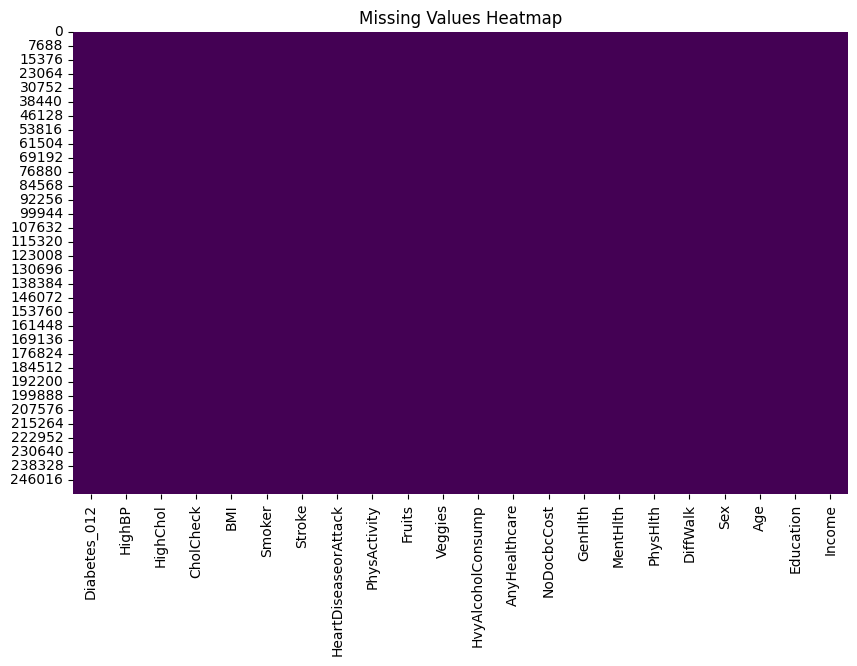

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [33]:
# Statistical Summary
print("\nSummary statistics for numerical features:")
print(df.describe())



Summary statistics for numerical features:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.0

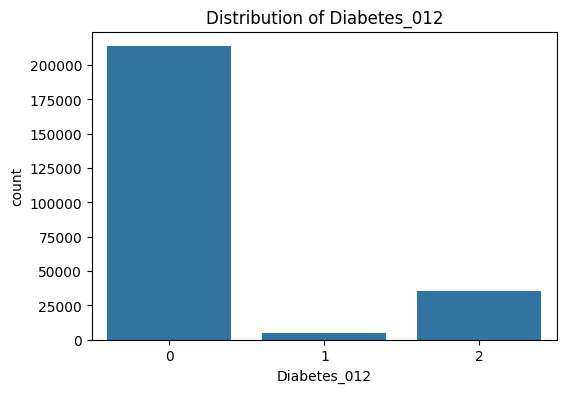

In [29]:
# Data Distribution 

plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes_012')
plt.show()


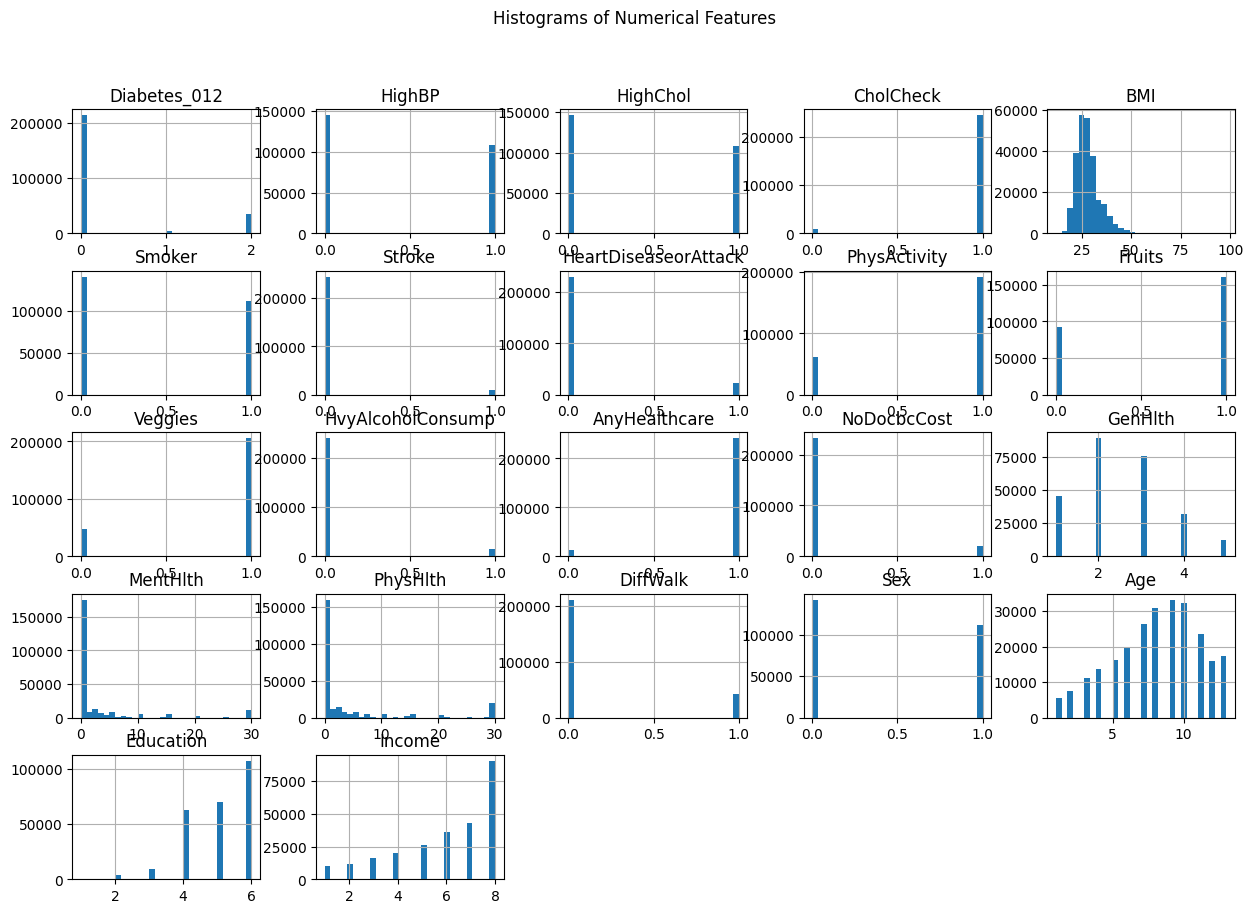

In [30]:

# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

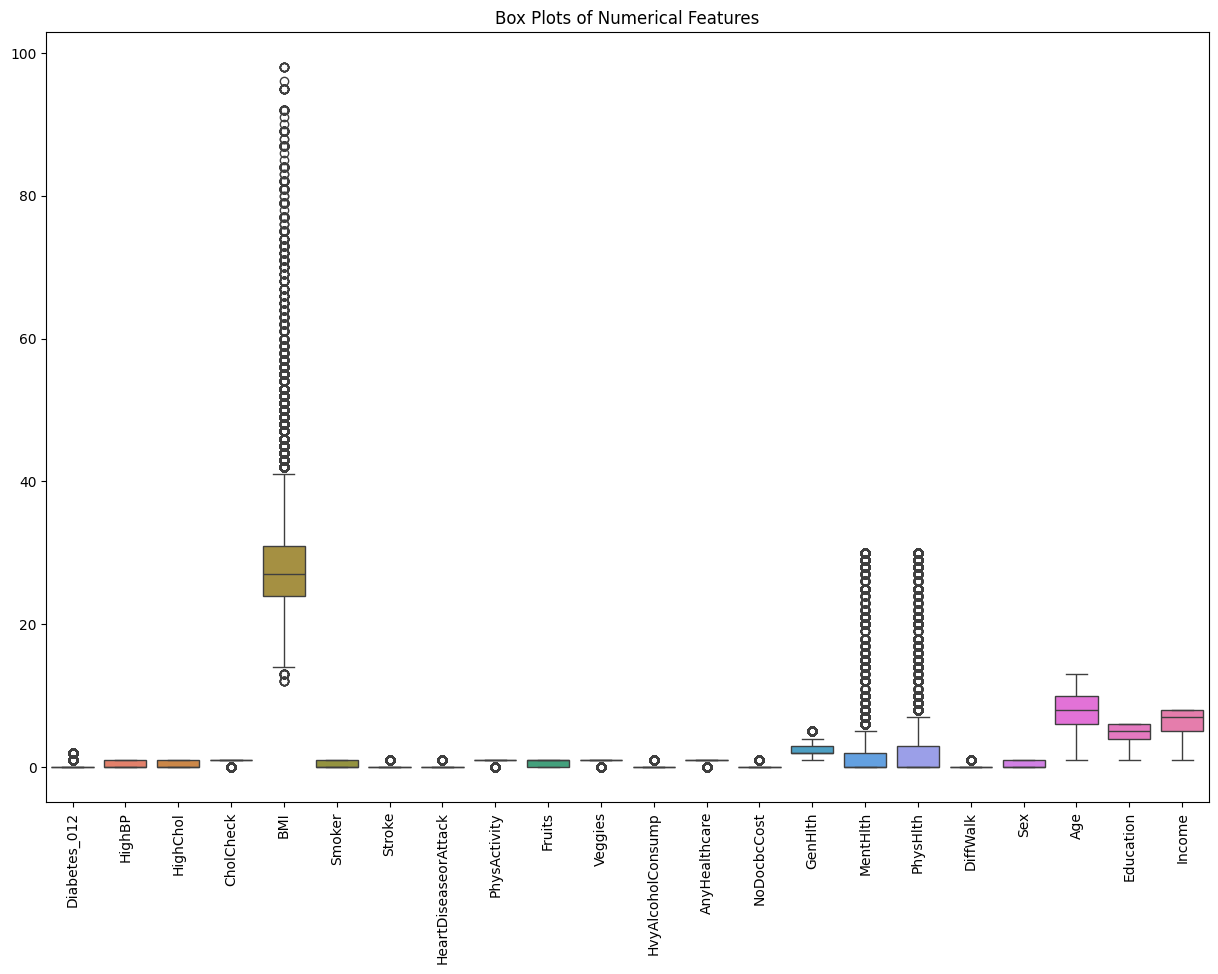

In [31]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

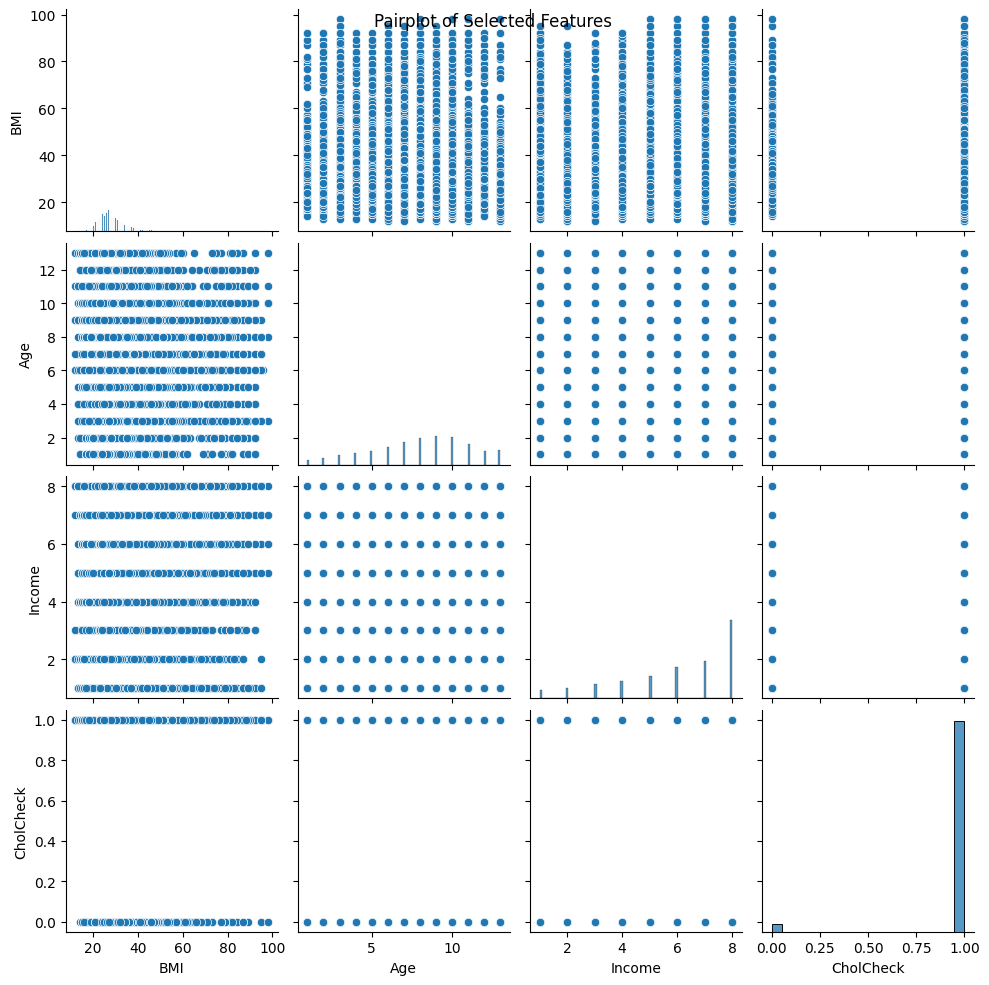

In [32]:
# Pairplot for selected features to visualize relationships
selected_features = ['BMI', 'Age', 'Income', 'CholCheck']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

In [34]:

correlation_matrix = df.corr()

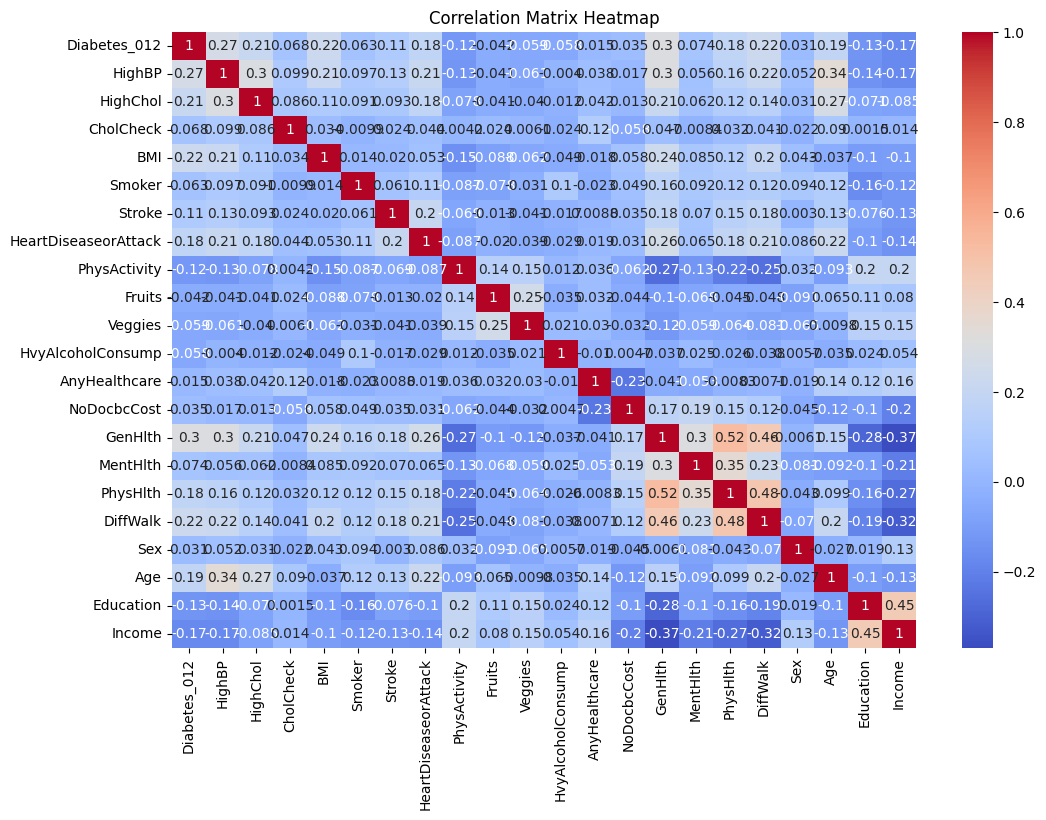

In [35]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [36]:
# Insight
print("\nCorrelation matrix for key features:")
print(correlation_matrix[['Income', 'Education']])


# Drop these columns
df_dropped = df.drop(['Income', 'Education'], axis=1)

print("\nDataset after dropping 'Income' and 'Education' columns:")
print(df_dropped.head())



Correlation matrix for key features:
                        Income  Education
Diabetes_012         -0.171483  -0.130517
HighBP               -0.171235  -0.141358
HighChol             -0.085459  -0.070802
CholCheck             0.014259   0.001510
BMI                  -0.100069  -0.103932
Smoker               -0.123937  -0.161955
Stroke               -0.128599  -0.076009
HeartDiseaseorAttack -0.141011  -0.099600
PhysActivity          0.198539   0.199658
Fruits                0.079929   0.110187
Veggies               0.151087   0.154329
HvyAlcoholConsump     0.053619   0.023997
AnyHealthcare         0.157999   0.122514
NoDocbcCost          -0.203182  -0.100701
GenHlth              -0.370014  -0.284912
MentHlth             -0.209806  -0.101830
PhysHlth             -0.266799  -0.155093
DiffWalk             -0.320124  -0.192642
Sex                   0.127141   0.019480
Age                  -0.127775  -0.101901
Education             0.449106   1.000000
Income                1.000000   0.449

In [37]:
# Save the cleaned dataset
df_dropped.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'
